In [ ]:
import pandas as pd
from tqdm import tqdm
import gensim
from gensim.models import Word2Vec
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Experiment 1**

In [ ]:
!pip install -q xlrd

import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/Similarty_models/All Datasets/Similarity Survey(Responses).xlsx')
data.head()

,Timestamp,Please write your Nickname,P2 Similar?,P3 Smilar?,P4 Smilar?,P6 Similar?,P7 Similar?,P8 Smilar?,P10 Similar?,P11 Similar?,...,P18 Similar?,P19 Similar?,P20 Smilar?,P1 Similar?,P5 Similar?,P9 Similar?,P13 Similar?,P17 Similar?,Please indicate your education level,Did you take course related to Computer science or Machine learning?
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-18 13:12:50.260,Rami22,No,No,No,No,Yes,No,Yes,Yes,...,No,No,Yes,Yes,Yes,No,No,No,BSc.,Yes
2,2022-08-18 13:17:05.479,Hawii,Yes,No,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,BSc.,Yes
3,2022-08-18 13:22:19.866,Alen,No,No,No,No,No,No,Yes,No,...,Yes,No,Yes,Yes,No,No,No,Yes,MSc.,Yes
4,2022-08-18 13:53:59.325,Medi,No,Yes,Yes,No,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,Yes,Yes,No,BSc.,Yes


In [ ]:
data = data.dropna().reset_index(drop=True) #Data cleaning
data 


,Timestamp,Please write your Nickname,P2 Similar?,P3 Smilar?,P4 Smilar?,P6 Similar?,P7 Similar?,P8 Smilar?,P10 Similar?,P11 Similar?,...,P18 Similar?,P19 Similar?,P20 Smilar?,P1 Similar?,P5 Similar?,P9 Similar?,P13 Similar?,P17 Similar?,Please indicate your education level,Did you take course related to Computer science or Machine learning?
0,2022-08-18 13:12:50.260,Rami22,No,No,No,No,Yes,No,Yes,Yes,...,No,No,Yes,Yes,Yes,No,No,No,BSc.,Yes
1,2022-08-18 13:17:05.479,Hawii,Yes,No,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,BSc.,Yes
2,2022-08-18 13:22:19.866,Alen,No,No,No,No,No,No,Yes,No,...,Yes,No,Yes,Yes,No,No,No,Yes,MSc.,Yes
3,2022-08-18 13:53:59.325,Medi,No,Yes,Yes,No,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,Yes,Yes,No,BSc.,Yes
4,2022-08-18 15:42:49.196,Ro123,Yes,No,No,No,No,No,No,No,...,No,No,Yes,No,No,No,No,No,-,No
5,2022-08-18 20:53:48.045,Kbcap,Yes,Yes,Yes,No,Yes,No,Yes,Yes,...,No,Yes,Yes,No,No,No,Yes,Yes,BSc.,No
6,2022-08-19 00:55:08.289,JohnIV,No,No,No,No,Yes,No,Yes,No,...,Yes,Yes,No,Yes,Yes,No,No,Yes,MSc.,Yes
7,2022-08-19 00:57:57.855,ZeusY,Yes,No,No,No,No,No,Yes,Yes,...,No,No,No,Yes,Yes,No,No,Yes,MSc.,Yes
8,2022-08-19 01:53:39.409,Ahmed,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,No,Yes,Yes,No,No,Yes,No,Yes,MSc.,Yes
9,2022-08-19 03:19:41.986,Isaac,No,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,Yes,No,No,No,Yes,Ph.D.,Yes


In [ ]:
#pip install git+https://github.com/Shamya/FleissKappa
'''Created on Aug 1, 2016
@author: skarumbaiah

Computes Fleiss' Kappa 
Joseph L. Fleiss, Measuring Nominal Scale Agreement Among Many Raters, 1971.
'''


def checkInput(rate, n):
    """ 
    Check correctness of the input matrix
    @param rate - ratings matrix
    @return n - number of raters
    @throws AssertionError 
    """
    N = len(rate)
    k = len(rate[0])
    assert all(len(rate[i]) == k for i in range(k)), "Row length != #categories)"
    assert all(isinstance(rate[i][j], int) for i in range(N) for j in range(k)), "Element not integer" 
    assert all(sum(row) == n for row in rate), "Sum of ratings != #raters)"

def fleissKappa(rate,n):
    """ 
    Computes the Kappa value
    @param rate - ratings matrix containing number of ratings for each subject per category 
    [size - N X k where N = #subjects and k = #categories]
    @param n - number of raters   
    @return fleiss' kappa
    """

    N = len(rate)
    k = len(rate[0])
    print("#raters = ", n, ", #subjects = ", N, ", #categories = ", k)
    checkInput(rate, n)

    #mean of the extent to which raters agree for the ith subject 
    PA = sum([(sum([i**2 for i in row])- n) / (n * (n - 1)) for row in rate])/N
    print("PA = ", PA)
    
    # mean of squares of proportion of all assignments which were to jth category
    PE = sum([j**2 for j in [sum([rows[i] for rows in rate])/(N*n) for i in range(k)]])
    print("PE =", PE)
    
    kappa = -float("inf")
    try:
        kappa = (PA - PE) / (1 - PE)
        kappa = float("{:.3f}".format(kappa))
    except ZeroDivisionError:
        print("Expected agreement = 1")

    print("Fleiss' Kappa =", kappa)
    
    return kappa



In [ ]:
ratingdpf=data
ratingspf=data.dropna().transpose()

cleanratingspf=ratingspf.iloc[2:22,:] # Select columns by Index
cleanratingspf

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
P2 Similar?,No,Yes,No,No,Yes,Yes,No,Yes,Yes,No,...,No,No,No,No,Yes,No,No,No,No,No
P3 Smilar?,No,No,No,Yes,No,Yes,No,No,No,No,...,Yes,No,No,Yes,No,No,Yes,No,No,No
P4 Smilar?,No,No,No,Yes,No,Yes,No,No,Yes,No,...,No,No,No,Yes,No,No,No,No,No,No
P6 Similar?,No,Yes,No,No,No,No,No,No,Yes,Yes,...,No,No,No,No,Yes,No,No,No,No,No
P7 Similar?,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,...,No,No,No,No,No,No,Yes,Yes,Yes,Yes
P8 Smilar?,No,Yes,No,Yes,No,No,No,No,No,No,...,No,No,No,Yes,Yes,No,Yes,No,No,No
P10 Similar?,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
P11 Similar?,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,...,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes
P12 Smilar?,No,Yes,No,No,No,Yes,No,No,No,No,...,No,No,Yes,No,No,No,No,No,No,Yes
P14 Similar?,Yes,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes


In [ ]:
cleanratingspf=cleanratingspf.transpose()
cleanratingspf

,P2 Similar?,P3 Smilar?,P4 Smilar?,P6 Similar?,P7 Similar?,P8 Smilar?,P10 Similar?,P11 Similar?,P12 Smilar?,P14 Similar?,P15 Similar?,P16 Smilar?,P18 Similar?,P19 Similar?,P20 Smilar?,P1 Similar?,P5 Similar?,P9 Similar?,P13 Similar?,P17 Similar?
0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,Yes,No,No,No
1,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Yes
3,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No
4,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No
5,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Yes,Yes
6,No,No,No,No,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes
7,Yes,No,No,No,No,No,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,Yes
8,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes
9,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,No,Yes,Yes,No,No,No,Yes


In [ ]:
aggregatedratingspf=cleanratingspf.apply(pd.value_counts)

In [ ]:
ratingsarray=aggregatedratingspf.transpose().to_numpy()
ratingsarray

array([[25, 10],
       [25, 10],
       [29,  6],
       [31,  4],
       [15, 20],
       [30,  5],
       [ 9, 26],
       [ 7, 28],
       [26,  9],
       [10, 25],
       [28,  7],
       [ 3, 32],
       [14, 21],
       [23, 12],
       [14, 21],
       [ 6, 29],
       [20, 15],
       [29,  6],
       [27,  8],
       [11, 24]])

In [ ]:
ratingsarray_res=[]

for row in ratingsarray:
  ratingsarray_res.append(row.astype(int))


In [ ]:
ratings=[[25, 10],
       [25, 10],
       [29,  6],
       [31,  4],
       [15, 20],
       [30,  5],
       [ 9, 26],
       [ 7, 28],
       [26,  9],
       [10, 25],
       [28,  7],
       [ 3, 32],
       [14, 21],
       [23, 12],
       [14, 21],
       [ 6, 29],
       [20, 15],
       [29,  6],
       [27,  8],
       [11, 24]]
kappa = fleissKappa(ratings,35)

#raters =  35 , #subjects =  20 , #categories =  2
PA =  0.6263865546218486
PE = 0.5041795918367347
Fleiss' Kappa = 0.246


# **Experiment 2**

---



In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Similarty_models/All Datasets/Papers/All Papers_and_Datasets.csv")
data=data.astype(str)
data.tail()

,Topic,Paper_Title,Paper_Authors,Paper_Abstract,Dataset_List,Label_Dataset,MainId,Dataset_Name,Dataset_Authors,Dataset_Description
708,Question answering,Fantastic Questions and Where to Find Them: Fa...,"Ying Xu, Dakuo Wang, Mo Yu, Daniel Ritchie, Bi...",Question answering (QA) is a fundamental means...,30M Factoid Question-Answer Corpus (30MQA)\r,100,0,,nan,nan
709,Question answering,Multi-Hop Question Generation Using Hierarchic...,"Tianbo Ji,Chenyang Lyu, Zhichao Cao, Peng Cheng",Neural auto-regressive sequence-to-sequence mo...,30M Factoid Question-Answer Corpus (30MQA)\r,100,0,nan,nan,nan
710,Question answering,Automated assessment of subjective assignments...,"NaynaBirla, ManojKumar Jain, AvinashPanwar",Machine learning (ML) has recently gained popu...,30M Factoid Question-Answer Corpus (30MQA)\r,100,0,nan,nan,nan
711,Question answering,Increasing Student Engagement in Lessons and A...,"Younes-aziz Bachiri, Hicham Mouncif","In today’s generation of MOOCs, videos are fun...",30M Factoid Question-Answer Corpus (30MQA)\n,100,0,nan,nan,nan
712,Question answering,Parallel Construction: A Parallel Corpus Appro...,"Benny G. Johnson, Jeffrey S. Dittel, Rachel Va...",Automatic question generation (AQG) has many d...,30M Factoid Question-Answer Corpus (30MQA)\r,100,0,nan,nan,nan


In [ ]:
allpapers=data
def getPaperAttributeValueForDataset(dataframe, datasetid,attribute_name,paper_hop=False):
  if not paper_hop:
    title_frame=dataframe.loc[dataframe['Label_Dataset'] == str(datasetid)][attribute_name].to_frame()
  else:
      if paper_hop=='1':
        title_frame=dataframe.loc[dataframe['Label_Dataset'] == str(datasetid)].loc[dataframe['MainId'] =='1'][attribute_name].to_frame()
      else:
        title_frame=dataframe.loc[dataframe['Label_Dataset'] == str(datasetid)].loc[dataframe['MainId']=='0'][attribute_name].to_frame()
  
  return title_frame

def concatenateDatasetAttributes(dataframe, datasetid,attribute_name,paper_hop=False):
  title_frame=getPaperAttributeValueForDataset(dataframe, datasetid,attribute_name,paper_hop)
  title_frame["help"]="1"
  return str(title_frame.groupby("help")[attribute_name].agg(lambda column: " ".join([item for item in column if (isinstance(item, str) and item!='nan')  == True] ))[0])


#print(concatenateDatasetAttributes(data, 2,'Paper title'))
#print(concatenateDatasetAttributes(data, 5,'Paper title'))


  
print(concatenateDatasetAttributes(allpapers , 1,'Dataset_Authors'))

#allpapers


#for datasetid in
#  for label in ['Paper title',	'Paper Authors', 'Paper Abstract',	'Dataset name']:


Anna Primpeli, Christian Bizer



In [ ]:
import numpy as np

import itertools
import random
from tqdm import tqdm
import math


import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
#donwloadin the stopwords of english language
stopwords=stopwords.words('english')
tokenizer = nltk.RegexpTokenizer(r"\w+") #for removel of punchuation 

def nltk_tokenizer(sentence):
    tokens = []
    for word in tokenizer.tokenize(sentence):
        word=word.lower()
        if word in stopwords:
            continue
        #if (len(word) < 3): # words with length less then 1
           # continue
        if (word == " "): #space
             continue
        if not (word.isalpha()):
           continue
        tokens.append(word)
    return tokens

def process_text_raw(raw_text):
    processed_text = []
  
    tokens = ""
    for word in nltk_tokenizer(raw_text.lower()):
          tokens+=word+" "     
    processed_text.append(tokens)
    #print("The tokenized data is ready") 
    return processed_text

def process_authors_raw(raw_text):  #Authors Tokenizer
    return [v.strip() for v in raw_text.split(",")]
 

class SimilarityEstimator:
    modelname=""
   
    def getName(self):
      return self.modelname

    def __init__(self, modelname, splittype='tokenize'):
      self.splittype=splittype
      self.modelname=modelname
      self.model= Word2Vec.load("/content/drive/MyDrive/Implementation/"+modelname+".model")
      # You can access the models using thie link 
      # https://drive.google.com/drive/folders/1quZZ3Iv3w-zsrKAkKCH8p6LormkY6G87?usp=sharing


    def similarity(self,dataframe, datasetid1,datasetid2):
      concat_paper_attr1= concatenateDatasetAttributes(dataframe, datasetid1,self.modelname)
      concat_paper_attr2= concatenateDatasetAttributes(dataframe, datasetid2,self.modelname)
      #ret =  model.vw.similariry(concat_paper_attr1,concat_paper_attr2)
      if self.splittype=='tokenize':
        text_attr_1=process_text_raw(concat_paper_attr1)
        text_attr_2=process_text_raw(concat_paper_attr2)
      else:
        text_attr_1=process_authors_raw(concat_paper_attr1)
        text_attr_2=process_authors_raw(concat_paper_attr2)
      
      words_in_sentences_1=[]
      words_in_sentences_2=[]

      for i in tqdm(text_attr_1):
        cleaned_words=[]
        for word in i.split():
          if word in  self.model.wv:
            cleaned_words.append(word)
        words_in_sentences_1=cleaned_words

      for i in tqdm(text_attr_2):
        cleaned_words=[]
        for word in i.split():
          if word in  self.model.wv:
            cleaned_words.append(word)
        words_in_sentences_2=cleaned_words  
     # print(words_in_sentences_1)
     # print(words_in_sentences_2)
      if len(words_in_sentences_1)==0 or len(words_in_sentences_2)==0:
        print("EXCEPTION W2V")
        print("att1:\t"+concat_paper_attr1)
        print("att1 in W2V:\t"+str(words_in_sentences_1))
        print("att2:\t"+concat_paper_attr2)
        print("att2 in W2V:\t"+str(words_in_sentences_2))
        return float("nan")
      ret=self.model.wv.n_similarity(words_in_sentences_1, words_in_sentences_2)
      
      return ret


class JaccardSimilarityEstimator:
    modelname=""
    def getName(self):
      return  "Jaccard_"+self.modelname
    def __init__(self, modelname, splittype='tokenize'):
      self.modelname=modelname
      self.splittype=splittype
      #print("jaccard")

    def similarity(self,dataframe, datasetid1,datasetid2):
      concat_paper_attr1= concatenateDatasetAttributes(dataframe, datasetid1,self.modelname)
      concat_paper_attr2= concatenateDatasetAttributes(dataframe, datasetid2,self.modelname)
      if self.splittype=='tokenize':
        text_attr_1=process_text_raw(concat_paper_attr1)
        text_attr_2=process_text_raw(concat_paper_attr2)
      else:
        text_attr_1=process_authors_raw(concat_paper_attr1)
        text_attr_2=process_authors_raw(concat_paper_attr2)
      words_in_sentences_1=[]
      words_in_sentences_2=[]
      for i in tqdm(text_attr_1):
        cleaned_words=[]
        for word in i.split():
         # if word in  model.wv:
            cleaned_words.append(word)
        words_in_sentences_1=cleaned_words
      for i in tqdm(text_attr_2):
        cleaned_words=[]
        for word in i.split():
         # if word in  model.wv:
            cleaned_words.append(word)
        words_in_sentences_2=cleaned_words  
      if len(words_in_sentences_1)==0 or len(words_in_sentences_2)==0:
        print("EXCEPTION JACCARD!")
        print("att1:\t"+concat_paper_attr1)
        print("att2:\t"+concat_paper_attr2)
        return float("nan")

      A=set(  words_in_sentences_1)
      B=set(  words_in_sentences_2)
      intersection = A.intersection(B)
      union = A.union(B)
      JSim=float(len(intersection)) / len(union)
     #  print("Jaccard Similarity",JSim)        
        
      return JSim


def random_pairs(stuff, seed=4,countpairs=10):
  combinations=[]
  for subset in itertools.combinations(stuff, 2):
    combinations.append(subset)

  combinations=sorted(combinations)
  random.Random(seed).shuffle(combinations)
  return combinations[:countpairs]

def random_pairs2(a, b,seed,countpairs=10):
  return random.Random(seed).sample(set(itertools.product(a,b)), countpairs)

def getdatasetIDsForTopic(dataframe,topic):
  return dataframe.loc[allpapers['Topic'] ==topic].groupby(['Label_Dataset']).count().reset_index()['Label_Dataset'].values

def getTopics(dataframe):
  return dataframe.groupby(['Topic']).count().reset_index()['Topic'].values


def calculateSimilarity(dataframe, datasetid1,datasetid2,attribute_name, model):
      concat_paper_attr1= concatenateDatasetAttributes(dataframe, datasetid1,attribute_name)
      concat_paper_attr2= concatenateDatasetAttributes(dataframe, datasetid2,attribute_name)
      sim=model.similarity(concat_paper_attr1,concat_paper_attr1)

      return sim
def getDatasetsByTopics(allpapers):
  datasetsByTopic={}
  topics=[]
  for topic in getTopics(allpapers):
    topics.append(topic)
    datasetsByTopic[topic]=getdatasetIDsForTopic(allpapers,topic)
  return datasetsByTopic

def splitPosNegPairs(topic1,datasetsByTopic,seed):
    pos=[]
    neg=[]

    for topic in datasetsByTopic:
      if topic!=topic1:
        for id in datasetsByTopic[topic]:
          neg.append(id)
      else:
        pos=datasetsByTopic[topic1]

    pospairs=random_pairs(pos,seed)
    negpairs=random_pairs2(pos,neg,seed)

    return {"neg":negpairs, "pos":pospairs}

  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
allpapers=data
#models={'Paper_Title':SimilarityEstimator('Paper_Title'),	'Paper_Authors':SimilarityEstimator('Paper_Authors'), 'Paper_Abstract':SimilarityEstimator('Paper_Abstract'),	'Dataset_Name':SimilarityEstimator('Dataset_Name'),'Dataset_Description':SimilarityEstimator('Dataset_Description'),'Dataset_Authors':SimilarityEstimator('Dataset_Authors'),'Jaccard_Dataset_Authors':JaccardSimilarityEstimator('Dataset_Authors'),'Jaccard_Paper_Authors':JaccardSimilarityEstimator('Dataset_Authors')}
models={#'Paper_Authors':[SimilarityEstimator('Paper_Authors',splittype='array')],
        'Paper_Title':[SimilarityEstimator('Paper_Title')],
        'Paper_Abstract':[SimilarityEstimator('Paper_Abstract')],	
        'Dataset_Name':[SimilarityEstimator('Dataset_Name')],
        'Dataset_Description':[SimilarityEstimator('Dataset_Description')]
       # 'Dataset_Authors':[SimilarityEstimator('Dataset_Authors',splittype='array')]
        }

#models={'Paper_Authors':[SimilarityEstimator('Paper_Authors'),JaccardSimilarityEstimator('Paper_Authors')]}


In [ ]:
def calculate_similarities(allpapers, models):
  large_similarity_table = pd.DataFrame(columns=['Topic','Modelname','PosNeg','ID_DS1','ID_DS2','similarity'])


  datasetsByTopics=getDatasetsByTopics(allpapers)
  for topic in datasetsByTopics:
      for attribute_name in ['Paper_Title', 'Paper_Abstract','Dataset_Name','Dataset_Description']:
        for model in models[attribute_name]:

            allpairs=splitPosNegPairs(topic,datasetsByTopics,4)
            
            for posneg in allpairs:
              for pair_ids in allpairs[posneg]:
                sim=model.similarity(allpapers, pair_ids[0],pair_ids[1])
                newrow=pd.DataFrame([[topic,model.getName(),posneg,pair_ids[0],pair_ids[1],sim]],columns=['Topic','Modelname','PosNeg','ID_DS1','ID_DS2','similarity'])
              # if empty:
              #   large_similarity_table=newrow
                #  empty=False
              # else:
              # print(large_similarity_table.head())
                large_similarity_table=large_similarity_table.append(newrow)
        
  return large_similarity_table



In [ ]:
large_similarity_table=calculate_similarities(allpapers, models)


100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


EXCEPTION W2V
att1:	
att1 in W2V:	[]
att2:	JFT-300M is an internal Google dataset used for training image classification models. Images are labeled using an algorithm that uses complex mixture of raw web signals, connections between web-pages and user feedback. This results in over one billion labels for the 300M images (a single image can have multiple labels). Of the billion image labels, approximately 375M are selected via an algorithm that aims to maximize label precision of selected images.
att2 in W2V:	['internal', 'google', 'dataset', 'used', 'training', 'image', 'classification', 'models', 'images', 'labeled', 'using', 'algorithm', 'uses', 'complex', 'mixture', 'raw', 'web', 'signals', 'connections', 'web', 'pages', 'user', 'feedback', 'results', 'one', 'billion', 'labels', 'images', 'single', 'image', 'multiple', 'labels', 'billion', 'image', 'labels', 'approximately', 'selected', 'via', 'algorithm', 'aims', 'maximize', 'label', 'precision', 'selected', 'images']


100%|██████████| 1/1 [00:00<00:00, 5974.79it/s]


EXCEPTION W2V
att1:	
att1 in W2V:	[]
att2:	This dataset is from the Chinese open question answering dataset. After preliminary screening and processing, it is translated into Mongolian and the corpus is manually corrected. Finally, a corpus of 50 thousand pairs of Mongolian question and answer is constructed

att2 in W2V:	['dataset', 'chinese', 'open', 'question', 'answering', 'dataset', 'preliminary', 'screening', 'processing', 'translated', 'mongolian', 'corpus', 'manually', 'corrected', 'finally', 'corpus', 'thousand', 'pairs', 'mongolian', 'question', 'answer', 'constructed']


100%|██████████| 1/1 [00:00<00:00, 8490.49it/s]


EXCEPTION W2V
att1:	MMKG is a collection of three knowledge graphs for link prediction and entity matching research. Contrary to other knowledge graph datasets, these knowledge graphs contain both numerical features and images for all entities as well as entity alignments between pairs of KGs. While MMKG is intended to perform relational reasoning across different entities and images, previous resources are intended to perform visual reasoning within the same image.

The three knowledge graphs augmented with numerical features and images are called FB15k, YAGO15k, and DBPEDIA15k.
att1 in W2V:	['mmkg', 'collection', 'three', 'knowledge', 'graphs', 'link', 'prediction', 'entity', 'matching', 'research', 'contrary', 'knowledge', 'graph', 'datasets', 'knowledge', 'graphs', 'contain', 'numerical', 'features', 'images', 'entities', 'well', 'entity', 'alignments', 'pairs', 'kgs', 'mmkg', 'intended', 'perform', 'relational', 'reasoning', 'across', 'different', 'entities', 'images', 'previous',

100%|██████████| 1/1 [00:00<00:00, 7973.96it/s]


EXCEPTION W2V
att1:	CORD-19 Named Entities Knowledge Graph (CORD19-NEKG) is an RDF dataset describing named entities identified in the scholarly articles of the COVID-19 Open Research Dataset (CORD-19), a resource of over 47,000 articles about COVID-19 and the coronavirus family of viruses.
att1 in W2V:	['cord', 'named', 'entities', 'knowledge', 'graph', 'rdf', 'dataset', 'describing', 'named', 'entities', 'identified', 'scholarly', 'articles', 'covid', 'open', 'research', 'dataset', 'cord', 'resource', 'articles', 'covid', 'coronavirus', 'family', 'viruses']
att2:	
att2 in W2V:	[]


100%|██████████| 1/1 [00:00<00:00, 7256.58it/s]


EXCEPTION W2V
att1:	sun397  
att1 in W2V:	[]
att2:	CoQA Conversational Question Answering Dataset 
att2 in W2V:	['coqa', 'conversational', 'question', 'answering', 'dataset']


100%|██████████| 1/1 [00:00<00:00, 6009.03it/s]


EXCEPTION W2V
att1:	CRACK500
att1 in W2V:	[]
att2:	MULTI-TEMPORAL REMOTE SENSING IMAGE CLASSIFICATION - A MULTI-VIEW APPROACH
att2 in W2V:	['multi', 'temporal', 'remote', 'sensing', 'image', 'classification', 'multi', 'view', 'approach']


100%|██████████| 1/1 [00:00<00:00, 7928.74it/s]


EXCEPTION W2V
att1:	sun397  
att1 in W2V:	[]
att2:	Citrus Plant Dataset
att2 in W2V:	['citrus', 'plant', 'dataset']


100%|██████████| 1/1 [00:00<00:00, 8371.86it/s]


EXCEPTION W2V
att1:	Datasets for Social Media Image Classification for Disaster Response
att1 in W2V:	['datasets', 'social', 'media', 'image', 'classification', 'disaster', 'response']
att2:	MiniSun  
att2 in W2V:	[]


100%|██████████| 1/1 [00:00<00:00, 7061.12it/s]


EXCEPTION W2V
att1:	CRACK500
att1 in W2V:	[]
att2:	ImageNet 50 samples per class Dataset
att2 in W2V:	['imagenet', 'samples', 'per', 'class', 'dataset']


100%|██████████| 1/1 [00:00<00:00, 10058.28it/s]


EXCEPTION W2V
att1:	VANiLLa dataset
att1 in W2V:	['vanilla', 'dataset']
att2:	CRACK500
att2 in W2V:	[]


100%|██████████| 1/1 [00:00<00:00, 8719.97it/s]


EXCEPTION W2V
att1:	VilaQuAD: an extractive QA dataset from Catalan newswire
att1 in W2V:	['extractive', 'dataset', 'catalan', 'newswire']
att2:	QA4MRE   
att2 in W2V:	[]


100%|██████████| 1/1 [00:00<00:00, 8305.55it/s]


EXCEPTION W2V
att1:	The Stanford Question Answering Dataset (SQuAD) is a collection of question-answer pairs derived from Wikipedia articles. In SQuAD, the correct answers of questions can be any sequence of tokens in the given text. Because the questions and answers are produced by humans through crowdsourcing, it is more diverse than some other question-answering datasets. SQuAD 1.1 contains 107,785 question-answer pairs on 536 articles. SQuAD2.0 (open-domain SQuAD, SQuAD-Open), the latest version, combines the 100,000 questions in SQuAD1.1 with over 50,000 un-answerable questions written adversarially by crowdworkers in forms that are similar to the answerable ones.

att1 in W2V:	['stanford', 'question', 'answering', 'dataset', 'squad', 'collection', 'question', 'answer', 'pairs', 'derived', 'wikipedia', 'articles', 'squad', 'correct', 'answers', 'questions', 'sequence', 'tokens', 'given', 'text', 'questions', 'answers', 'produced', 'humans', 'crowdsourcing', 'diverse', 'question', 

100%|██████████| 1/1 [00:00<00:00, 4249.55it/s]


In [ ]:
large_similarity_table=large_similarity_table.dropna()

In [ ]:
large_similarity_table.groupby(["Topic","Modelname"]).mean()
#large_similarity_table.groupby(["Modelname",'PosNeg']).agg()
#similarity_groupby=large_similarity_table.groupby(["Modelname","Topic",'PosNeg']).agg( {
#        "similarity": ["mean","std"],
#    })
similarity_groupby=large_similarity_table.groupby(["Modelname",'Topic','PosNeg']).agg( {
        "similarity": ["mean","std"],
    })

In [ ]:
similarity_groupby

similarity          
                                                      mean       std
Modelname           Topic                PosNeg                     
Dataset_Description Entity Matching      neg      0.678151  0.093028
                                         pos      0.825500  0.078262
                    Image classification neg      0.666885  0.113593
                                         pos      0.744169  0.099723
                    Question answering   neg      0.697200  0.114786
                                         pos      0.794120  0.089282
Dataset_Name        Entity Matching      neg      0.449543  0.194187
                                         pos      0.425777  0.356451
                    Image classification neg      0.354185  0.151143
                                         pos      0.483431  0.200274
                    Question answering   neg      0.548981  0.185974
                                         pos      0.538005  0.380801
Paper_Abstract      Entity Matching      neg      0.393465  0.259929
                                         pos      0.727403  0.132163
                    Image classification neg      0.279849  0.222805
                                         pos      0.469734  0.124875
                    Question answering   neg      0.435606  0.292776
                                         pos      0.707763  0.137799
Paper_Title         Entity Matching      neg      0.551538  0.186039
                                         pos      0.720928  0.129003
                    Image classification neg      0.408756  0.234166
                                         pos      0.692716  0.131337
                    Question answering   neg      0.520313  0.256276
                                         pos      0.756446  0.140393

In [ ]:

from statistics import harmonic_mean
from scipy.stats import ttest_ind
from functools import reduce
def get_harmonic_mean(large_similarity_table, columns=["Modelname"]):
  retdf=pd.DataFrame(columns=['Key','pos_mean','neg_mean','statistics','pvalue','harmonic_mean'])

  for key, grp in large_similarity_table.groupby(columns):
    pos_subset=grp.loc[grp['PosNeg'] =='pos']
    neg_subset=grp.loc[grp['PosNeg'] =='neg']
    ttestres=ttest_ind(pos_subset['similarity'], neg_subset['similarity'])
    harmonic_pair = (pos_subset.mean()[2],1-neg_subset.mean()[2])
    #harmonic_pair=(1.,3.)
    harmonic_res=harmonic_mean(harmonic_pair)
    #pd.DataFrame([[key,pos_subset.mean()[2],neg_subset.mean()[2], ttestres["statistics"],ttestres["pvalue"],1.]],columns=['Key','pos_mean','neg_mean','statistics','pvalue','harmonic_mean'])
    retdf=retdf.append(pd.DataFrame([[key,pos_subset.mean()[2],neg_subset.mean()[2],"",ttestres.pvalue,harmonic_res,pos_subset.mean()[2]-neg_subset.mean()[2]]],columns=['Key','pos_mean','neg_mean','statistics','pvalue','harmonic_mean','Distance']))
    
    #newrow=pd.DataFrame([[key,pos_subset.mean()[2], neg_subset.mean()[2], ttestres["statistics"],  ttestres["pvalue"]])
  return retdf

harmonic_mean_table=get_harmonic_mean(large_similarity_table)

print(harmonic_mean_table)



                   Key  pos_mean  neg_mean statistics    pvalue  \
0  Dataset_Description  0.785246  0.680328             0.000254   
0         Dataset_Name  0.480016  0.450854             0.688903   
0       Paper_Abstract  0.634966  0.369640             0.000020   
0          Paper_Title  0.723363  0.493535             0.000012   

   harmonic_mean  Distance  
0       0.454370  0.104918  
0       0.512259  0.029162  
0       0.632655  0.265326  
0       0.595787  0.229828  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  from ipykernel import kernelapp as app


             Topic            Modelname PosNeg ID_DS1 ID_DS2  similarity
0  Entity Matching  Dataset_Description    neg      6     75    0.668600
0  Entity Matching  Dataset_Description    neg     33     74    0.565764
0  Entity Matching  Dataset_Description    neg     25     45    0.691346
0  Entity Matching  Dataset_Description    neg     15     78    0.730548
0  Entity Matching  Dataset_Description    neg     18     76    0.789677


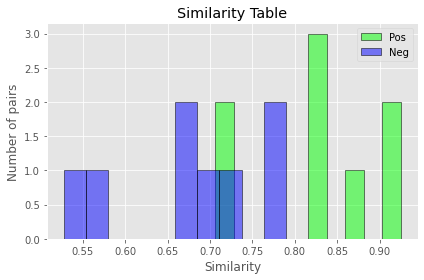

             Topic     Modelname PosNeg ID_DS1 ID_DS2  similarity
0  Entity Matching  Dataset_Name    neg      6     75    0.215947
0  Entity Matching  Dataset_Name    neg     39     52    0.350731
0  Entity Matching  Dataset_Name    neg     33     74    0.305901
0  Entity Matching  Dataset_Name    neg     25     45    0.501911
0  Entity Matching  Dataset_Name    neg     39     72    0.389272


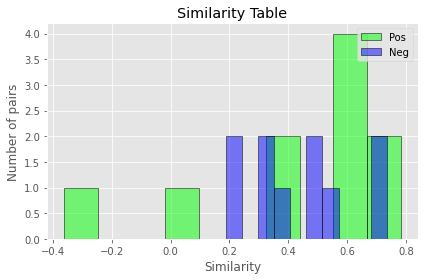

             Topic       Modelname PosNeg ID_DS1 ID_DS2  similarity
0  Entity Matching  Paper_Abstract    neg      6     75    0.389806
0  Entity Matching  Paper_Abstract    neg     39     52   -0.070433
0  Entity Matching  Paper_Abstract    neg     33     74    0.525144
0  Entity Matching  Paper_Abstract    neg     25     45    0.579833
0  Entity Matching  Paper_Abstract    neg     39     72    0.089294


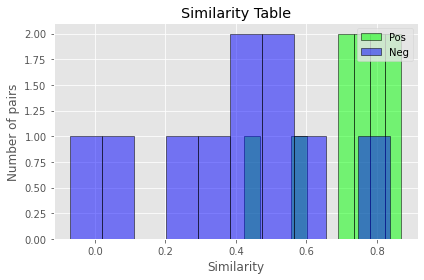

             Topic    Modelname PosNeg ID_DS1 ID_DS2  similarity
0  Entity Matching  Paper_Title    neg      6     75    0.630587
0  Entity Matching  Paper_Title    neg     39     52    0.220149
0  Entity Matching  Paper_Title    neg     33     74    0.615071
0  Entity Matching  Paper_Title    neg     25     45    0.414637
0  Entity Matching  Paper_Title    neg     39     72    0.337141


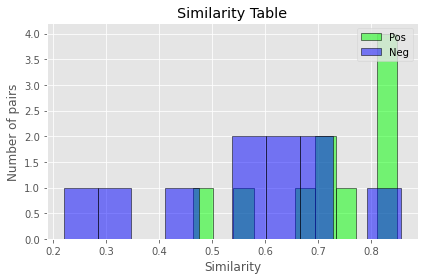

                  Topic            Modelname PosNeg ID_DS1 ID_DS2  similarity
0  Image classification  Dataset_Description    neg     57     79    0.668978
0  Image classification  Dataset_Description    neg     65     31    0.776809
0  Image classification  Dataset_Description    neg     42     90    0.763169
0  Image classification  Dataset_Description    neg     54     15    0.672321
0  Image classification  Dataset_Description    neg     63     85    0.737934


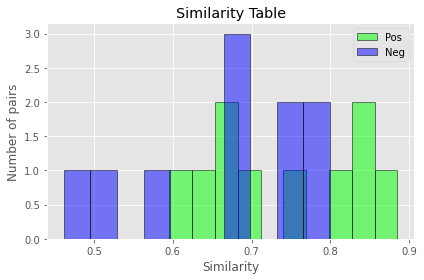

                  Topic     Modelname PosNeg ID_DS1 ID_DS2  similarity
0  Image classification  Dataset_Name    neg     57     79    0.263134
0  Image classification  Dataset_Name    neg     65     31    0.580976
0  Image classification  Dataset_Name    neg     42     90    0.500855
0  Image classification  Dataset_Name    neg     54     15    0.298501
0  Image classification  Dataset_Name    neg     63     85    0.468062


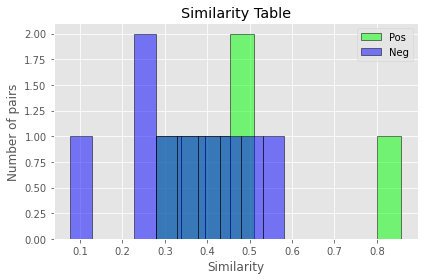

                  Topic       Modelname PosNeg ID_DS1 ID_DS2  similarity
0  Image classification  Paper_Abstract    neg     57     79    0.150693
0  Image classification  Paper_Abstract    neg     65     31    0.627336
0  Image classification  Paper_Abstract    neg     42     90    0.245186
0  Image classification  Paper_Abstract    neg     54     15    0.232079
0  Image classification  Paper_Abstract    neg     63     85    0.180776


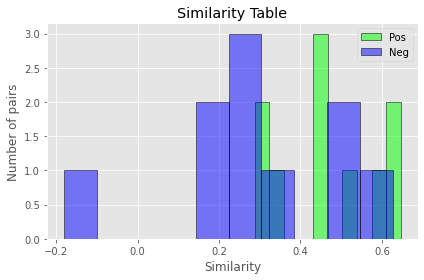

                  Topic    Modelname PosNeg ID_DS1 ID_DS2  similarity
0  Image classification  Paper_Title    neg     57     79    0.549018
0  Image classification  Paper_Title    neg     65     31    0.878393
0  Image classification  Paper_Title    neg     42     90    0.309973
0  Image classification  Paper_Title    neg     54     15    0.508657
0  Image classification  Paper_Title    neg     63     85    0.208355


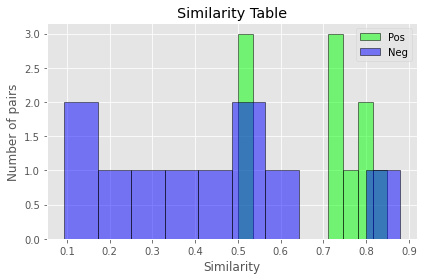

                Topic            Modelname PosNeg ID_DS1 ID_DS2  similarity
0  Question answering  Dataset_Description    neg     85     53    0.737934
0  Question answering  Dataset_Description    neg     79     12    0.836923
0  Question answering  Dataset_Description    neg     74     33    0.565764
0  Question answering  Dataset_Description    neg     97      2    0.816685
0  Question answering  Dataset_Description    neg     74     46    0.560093


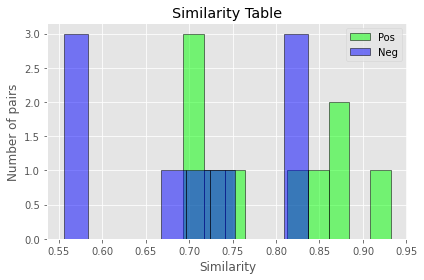

                Topic     Modelname PosNeg ID_DS1 ID_DS2  similarity
0  Question answering  Dataset_Name    neg     85     53    0.468062
0  Question answering  Dataset_Name    neg     79     12    0.687323
0  Question answering  Dataset_Name    neg     75     39    0.322563
0  Question answering  Dataset_Name    neg     74     33    0.305901
0  Question answering  Dataset_Name    neg     97      2    0.911232


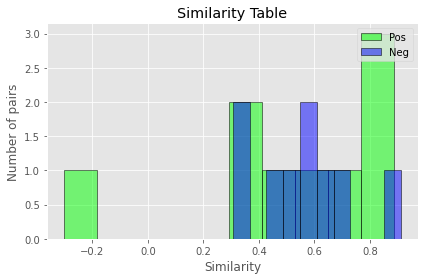

                Topic       Modelname PosNeg ID_DS1 ID_DS2  similarity
0  Question answering  Paper_Abstract    neg     85     53    0.114188
0  Question answering  Paper_Abstract    neg     79     12    0.766360
0  Question answering  Paper_Abstract    neg     75     39    0.277344
0  Question answering  Paper_Abstract    neg     74     33    0.525144
0  Question answering  Paper_Abstract    neg     97      2    0.674654


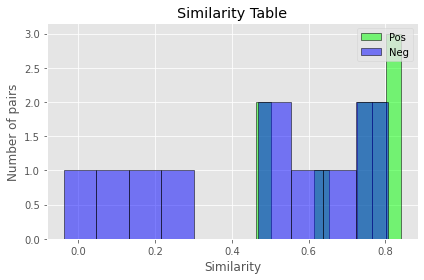

                Topic    Modelname PosNeg ID_DS1 ID_DS2  similarity
0  Question answering  Paper_Title    neg     85     53    0.142700
0  Question answering  Paper_Title    neg     79     12    0.840377
0  Question answering  Paper_Title    neg     75     39    0.508620
0  Question answering  Paper_Title    neg     74     33    0.615071
0  Question answering  Paper_Title    neg     97      2    0.703697


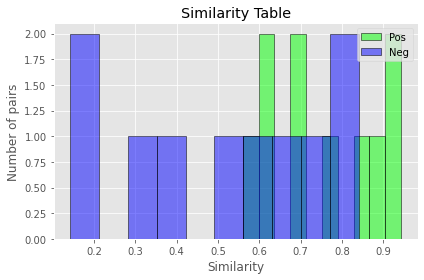

In [ ]:
import matplotlib.pyplot as plt

datasetsByTopics=getDatasetsByTopics(allpapers)
for topic in datasetsByTopics:
    modelspdf=large_similarity_table.loc[large_similarity_table['Topic'] ==topic]
    for key, group in modelspdf.groupby('Modelname'):
     
      onetopic=modelspdf.loc[modelspdf['Modelname'] ==key]
      print(onetopic.head())
      plt.style.use('ggplot')
      
      plt.title('Similarity Table')
      
      plt.hist(onetopic.loc[onetopic['PosNeg']=='pos']['similarity'],edgecolor='black',color='blue',bins=10,label='Pos',fc=(0, 1, 0, 0.5))
      plt.hist(onetopic.loc[onetopic['PosNeg']=='neg']['similarity'],edgecolor='black',color='brown',bins=10,label='Neg',fc=(0, 0, 1, 0.5))
      
      plt.legend(loc='upper right')
      
      plt.xlabel('Similarity')
      plt.ylabel('Number of pairs')
      
      plt.tight_layout()
      plt.savefig('Similarity.pdf', format="pdf", bbox_inches="tight")

      plt.show()


In [ ]:
allpapers=data

#  **Experiment 3**

In [ ]:
alldata = pd.read_csv("/content/drive/MyDrive/Similarty_models/All Datasets/Papers/All Papers_and_Datasets.csv")
corrdata = pd.read_csv("/content/drive/MyDrive/Similarty_models/Exeriment_ Correlation measure - Ranked_Lists.csv")
corrdata.head()

,Topic,ID_Ranked_Item,Tile_Ranked_Item,ID_Query_Item,Rank
0,Entity_Matching,7,ID: 7 The WDC Training Dataset and Gold Stan...,1,1
1,Entity_Matching,10,ID:10 Fine-Grained Entity Recognition,1,2
2,Entity_Matching,11,ID:11 Using the Semantic Web as a Source of ...,1,3
3,Entity_Matching,31,ID:31 News400 Dataset,1,4
4,Entity_Matching,5,"ID:5 Web Data Commons Phones Dataset, Augmente...",1,5


In [ ]:
corrdata.isnull().sum()
#data = data.dropna().reset_index(drop=True)

Topic               0
ID_Ranked_Item      0
Tile_Ranked_Item    0
ID_Query_Item       0
Rank                0
dtype: int64

In [ ]:
corrdata.groupby("ID_Query_Item").count().reset_index()['ID_Query_Item'].to_numpy()

array([ 1, 19, 42, 49])

In [ ]:
corrdata.loc[corrdata['ID_Query_Item']==1]

,Topic,ID_Ranked_Item,Tile_Ranked_Item,ID_Query_Item,Rank
0,Entity_Matching,7,ID: 7 The WDC Training Dataset and Gold Stan...,1,1
1,Entity_Matching,10,ID:10 Fine-Grained Entity Recognition,1,2
2,Entity_Matching,11,ID:11 Using the Semantic Web as a Source of ...,1,3
3,Entity_Matching,31,ID:31 News400 Dataset,1,4
4,Entity_Matching,5,"ID:5 Web Data Commons Phones Dataset, Augmente...",1,5
5,Entity_Matching,21,ID:21 Resources for reproducing experiments in...,1,6
6,Entity_Matching,0,ID:0 ANALISIS ENTITY MATCHING PADA DATASET SMA...,1,7
7,Entity_Matching,23,ID:23 COPIOUS: A gold standard corpus of named...,1,8
8,Entity_Matching,9,ID:9 Matching Web Tables with Knowledge Base E...,1,9
9,Entity_Matching,3,ID:3 Results of SemTab 2020,1,10


In [ ]:
corrdata.loc[corrdata['ID_Query_Item']==19]

,Topic,ID_Ranked_Item,Tile_Ranked_Item,ID_Query_Item,Rank
10,Entity_Matching,17,ID:17 XLORE,19,1
11,Entity_Matching,14,ID:14 MMKG Dataset,19,2
12,Entity_Matching,12,ID:12 Laying the Groundwork for Knowledge Base...,19,3
13,Entity_Matching,18,ID:18 Overview of Linguistic Resource for the ...,19,4
14,Entity_Matching,6,ID:6 SemTab 2020: Semantic Web Challenge on Ta...,19,5
15,Entity_Matching,15,ID:15 Aligning geographic entities from histor...,19,6
16,Entity_Matching,33,ID:33 A transition-based neural framework for ...,19,7
17,Entity_Matching,25,ID:25 Ace 2004 multilingual training corpus,19,8
18,Entity_Matching,27,ID:27 Covid-on-the-Web dataset,19,9
19,Entity_Matching,9,ID: 9 Matching Web Tables with Knowledge Base ...,19,10


In [ ]:
testtopics=['Entity_Matching','Image_Classification']

qitems=corrdata.groupby("ID_Query_Item").count().reset_index()['ID_Query_Item'].to_numpy()
autorankedlists=pd.DataFrame(columns=['Topic','Model','ID_Query_Item','ID_Rank_Item','Model_Score','Rank'])


for queryitem in qitems:
    for attribute_name in ['Paper_Title', 'Paper_Abstract','Dataset_Name','Dataset_Description']:
      rankedlist=corrdata.loc[corrdata['ID_Query_Item']==queryitem]
   
      #print(rankedlist)
      for model in models[attribute_name]:
        for idx,rankedrow in rankedlist.iterrows():
          rankeditem=rankedrow['ID_Ranked_Item']
          rank2=rankedrow['Rank']
          topic=rankedrow['Topic']
          sim=0
          sim=model.similarity(                allpapers,                 queryitem,                rankeditem)
          if math.isnan(sim):
            print ("NAN")
            print (str(topic)+"\t"+str(model.getName())+"\t"+str(queryitem)+"\t"+str(rankeditem))
          autorankedlists=autorankedlists.append(pd.DataFrame([[topic,model.getName(),queryitem,rankeditem,sim,rank2]],columns=['Topic','Model','ID_Query_Item','ID_Rank_Item','Model_Score','Rank']))

autorankedlists.head()

100%|██████████| 1/1 [00:00<00:00, 10180.35it/s]


EXCEPTION W2V
att1:	An augmented version of the amazon-google products dataset for benchmarking entity matching/record linkage methods found at:
https://dbs.uni-leipzig.de/research/projects/object_matching/benchmark_datasets_for_entity_resolution">https://dbs.uni-leipzig.de/research/projects/object_matching/benchmark_datasets_for_entity_resolutio...
The augmented version adds a fixed set of non-matching pairs to the original dataset. In addition, fixed splits for training, validation and testing as well as their corresponding feature vectors are provided. The feature vectors are built using data type specific similarity metrics.
The dataset contains 1,363 records describing products deriving from amazon which are matched against 3,226 product records from google. The gold standards have manual annotations for 1,298 matching and 6,306 non-matching pairs. The total number of attributes used to decribe the product records are 4 while the attribute density is 0.75.
The augmented dataset en

100%|██████████| 1/1 [00:00<00:00, 7194.35it/s]


EXCEPTION W2V
att1:	One table and 11 figures. Table 1 shows XLORE2 statistics. Figure 1 shows the framework of XLORE2. Figure 2 is an example of cross-lingual knowledge linking. Figure 3 presents the framework of cross-lingual knowledge linking. Figure 4 is an example of cross-lingual property matching (attribute matching). Figure 5 shows the framework of cross-lingual property matching. Figure 6 presents an example of mistakenly derived facts. Figure 7 is the framework of cross-lingual knowledge validation. Figure 8 shows an example of fine-grained type inference. Figure 9 depicts the framework of fine-grained type inference. Figure 10 is an illustration of XLink. Figure 11 shows the interface of XLORE2 and XLink

att1 in W2V:	['one', 'table', 'figures', 'table', 'shows', 'statistics', 'figure', 'shows', 'framework', 'figure', 'example', 'cross', 'lingual', 'knowledge', 'linking', 'figure', 'presents', 'framework', 'cross', 'lingual', 'knowledge', 'linking', 'figure', 'example', 'cros

100%|██████████| 1/1 [00:00<00:00, 6765.01it/s]


EXCEPTION W2V
att1:	sun397  
att1 in W2V:	[]
att2:	ImageNet Dataset
att2 in W2V:	['imagenet', 'dataset']
NAN
Image_Classification	Dataset_Name	49	50


100%|██████████| 1/1 [00:00<00:00, 2344.50it/s]


EXCEPTION W2V
att1:	sun397  
att1 in W2V:	[]
att2:	MSRC-v2 image dataset.
att2 in W2V:	['msrc', 'image', 'dataset']
NAN
Image_Classification	Dataset_Name	49	56


100%|██████████| 1/1 [00:00<00:00, 4969.55it/s]


EXCEPTION W2V
att1:	sun397  
att1 in W2V:	[]
att2:	Image data used for publication "Species-level image classification with convolutional neural network enable insect identification from habitus images "
att2 in W2V:	['image', 'data', 'used', 'publication', 'species', 'level', 'image', 'classification', 'convolutional', 'neural', 'network', 'enable', 'insect', 'identification', 'habitus', 'images']
NAN
Image_Classification	Dataset_Name	49	55


100%|██████████| 1/1 [00:00<00:00, 6765.01it/s]


EXCEPTION W2V
att1:	sun397  
att1 in W2V:	[]
att2:	ImageNet 50 samples per class Dataset
att2 in W2V:	['imagenet', 'samples', 'per', 'class', 'dataset']
NAN
Image_Classification	Dataset_Name	49	66


100%|██████████| 1/1 [00:00<00:00, 6026.30it/s]


EXCEPTION W2V
att1:	sun397  
att1 in W2V:	[]
att2:	MedMNIST v2 Dataset

att2 in W2V:	['medmnist', 'dataset']
NAN
Image_Classification	Dataset_Name	49	62


100%|██████████| 1/1 [00:00<00:00, 6413.31it/s]


EXCEPTION W2V
att1:	sun397  
att1 in W2V:	[]
att2:	Datasets for Social Media Image Classification for Disaster Response
att2 in W2V:	['datasets', 'social', 'media', 'image', 'classification', 'disaster', 'response']
NAN
Image_Classification	Dataset_Name	49	51


100%|██████████| 1/1 [00:00<00:00, 4894.17it/s]


EXCEPTION W2V
att1:	sun397  
att1 in W2V:	[]
att2:	DEIC Benchmark Dataset
att2 in W2V:	['benchmark', 'dataset']
NAN
Image_Classification	Dataset_Name	49	54


100%|██████████| 1/1 [00:00<00:00, 6594.82it/s]


EXCEPTION W2V
att1:	sun397  
att1 in W2V:	[]
att2:	Satellite image Classification Dataset-RSI-CB256
att2 in W2V:	['satellite', 'image', 'classification', 'dataset', 'rsi']
NAN
Image_Classification	Dataset_Name	49	60


100%|██████████| 1/1 [00:00<00:00, 8160.12it/s]


EXCEPTION W2V
att1:	sun397  
att1 in W2V:	[]
att2:	Intel Image Classification Dataset
att2 in W2V:	['intel', 'image', 'classification', 'dataset']
NAN
Image_Classification	Dataset_Name	49	42


100%|██████████| 1/1 [00:00<00:00, 7781.64it/s]


EXCEPTION W2V
att1:	sun397  
att1 in W2V:	[]
att2:	Satellite image Classification Dataset-RSI-CB256
att2 in W2V:	['satellite', 'image', 'classification', 'dataset', 'rsi']
NAN
Image_Classification	Dataset_Name	49	60


100%|██████████| 1/1 [00:00<00:00, 1810.23it/s]


,Topic,Model,ID_Query_Item,ID_Rank_Item,Model_Score,Rank
0,Entity_Matching,Paper_Title,1,7,0.882202,1
0,Entity_Matching,Paper_Title,1,10,0.832227,2
0,Entity_Matching,Paper_Title,1,11,0.686082,3
0,Entity_Matching,Paper_Title,1,31,0.733910,4
0,Entity_Matching,Paper_Title,1,5,0.817328,5


In [ ]:
#a1=autorankedlists.loc[autorankedlists["Model"]=='Paper_Title']
#a1.loc[a1['ID_Query_Item']==1]

In [ ]:
rankedlist=autorankedlists.sort_values(['ID_Query_Item', 'Model','Model_Score'],ascending = [False, True, False])

In [ ]:
rankedlist

,Topic,Model,ID_Query_Item,ID_Rank_Item,Model_Score,Rank
0,Image_Classification,Dataset_Description,49,50,0.926702,1
0,Image_Classification,Dataset_Description,49,62,0.886435,5
0,Image_Classification,Dataset_Description,49,54,0.884748,7
0,Image_Classification,Dataset_Description,49,56,0.881941,2
0,Image_Classification,Dataset_Description,49,66,0.880755,4
...,...,...,...,...,...,...
0,Entity_Matching,Paper_Title,1,3,0.776361,10
0,Entity_Matching,Paper_Title,1,31,0.733910,4
0,Entity_Matching,Paper_Title,1,0,0.703520,7
0,Entity_Matching,Paper_Title,1,11,0.686082,3


In [ ]:
rankedlists=rankedlist.groupby(["Topic","Model","ID_Query_Item"])

             Topic                Model ID_Query_Item ID_Rank_Item  \
0  Entity_Matching  Dataset_Description             1            5   
0  Entity_Matching  Dataset_Description             1           11   
0  Entity_Matching  Dataset_Description             1           23   
0  Entity_Matching  Dataset_Description             1            3   
0  Entity_Matching  Dataset_Description             1           10   
0  Entity_Matching  Dataset_Description             1            7   
0  Entity_Matching  Dataset_Description             1           31   
0  Entity_Matching  Dataset_Description             1           21   
0  Entity_Matching  Dataset_Description             1            0   
0  Entity_Matching  Dataset_Description             1            9   

   Model_Score Rank  Model_Rank  
0     0.991379    5           1  
0     0.922630    3           2  
0     0.845011    8           3  
0     0.828758   10           4  
0     0.816916    2           5  
0     0.814715    1      

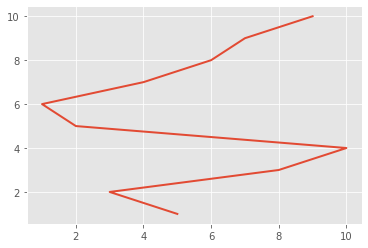

             Topic                Model ID_Query_Item ID_Rank_Item  \
0  Entity_Matching  Dataset_Description            19           25   
0  Entity_Matching  Dataset_Description            19           14   
0  Entity_Matching  Dataset_Description            19           17   
0  Entity_Matching  Dataset_Description            19           18   
0  Entity_Matching  Dataset_Description            19           12   
0  Entity_Matching  Dataset_Description            19           27   
0  Entity_Matching  Dataset_Description            19           15   
0  Entity_Matching  Dataset_Description            19           33   
0  Entity_Matching  Dataset_Description            19            6   
0  Entity_Matching  Dataset_Description            19            9   

   Model_Score Rank  Model_Rank  
0     0.847388    8           1  
0     0.820713    2           2  
0     0.811631    1           3  
0     0.777157    4           4  
0     0.762124    3           5  
0     0.703759    9      

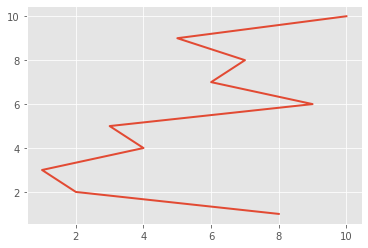

             Topic         Model ID_Query_Item ID_Rank_Item  Model_Score Rank  \
0  Entity_Matching  Dataset_Name             1            5     0.640359    5   
0  Entity_Matching  Dataset_Name             1           11     0.527482    3   
0  Entity_Matching  Dataset_Name             1            7     0.413631    1   
0  Entity_Matching  Dataset_Name             1            3     0.324506   10   
0  Entity_Matching  Dataset_Name             1           21     0.296866    6   
0  Entity_Matching  Dataset_Name             1            0     0.243560    7   
0  Entity_Matching  Dataset_Name             1            9     0.222919    9   
0  Entity_Matching  Dataset_Name             1           31     0.155187    4   
0  Entity_Matching  Dataset_Name             1           23     0.138518    8   
0  Entity_Matching  Dataset_Name             1           10     0.008571    2   

   Model_Rank  
0           1  
0           2  
0           3  
0           4  
0           5  
0           

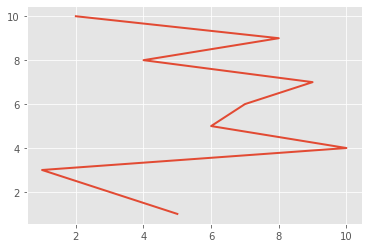

             Topic         Model ID_Query_Item ID_Rank_Item  Model_Score Rank  \
0  Entity_Matching  Dataset_Name            19            6     0.859891    5   
0  Entity_Matching  Dataset_Name            19           15     0.779691    6   
0  Entity_Matching  Dataset_Name            19           18     0.714100    4   
0  Entity_Matching  Dataset_Name            19           33     0.705347    7   
0  Entity_Matching  Dataset_Name            19            9     0.701940   10   
0  Entity_Matching  Dataset_Name            19           12     0.655834    3   
0  Entity_Matching  Dataset_Name            19           27     0.523421    9   
0  Entity_Matching  Dataset_Name            19           14     0.461344    2   
0  Entity_Matching  Dataset_Name            19           25     0.441276    8   
0  Entity_Matching  Dataset_Name            19           17    -0.364447    1   

   Model_Rank  
0           1  
0           2  
0           3  
0           4  
0           5  
0           

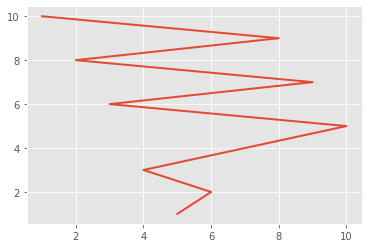

             Topic           Model ID_Query_Item ID_Rank_Item  Model_Score  \
0  Entity_Matching  Paper_Abstract             1            7     0.812328   
0  Entity_Matching  Paper_Abstract             1            5     0.776300   
0  Entity_Matching  Paper_Abstract             1           11     0.767018   
0  Entity_Matching  Paper_Abstract             1           10     0.732660   
0  Entity_Matching  Paper_Abstract             1           21     0.721298   
0  Entity_Matching  Paper_Abstract             1            9     0.719483   
0  Entity_Matching  Paper_Abstract             1            3     0.709391   
0  Entity_Matching  Paper_Abstract             1           23     0.672039   
0  Entity_Matching  Paper_Abstract             1           31     0.642070   
0  Entity_Matching  Paper_Abstract             1            0     0.253841   

  Rank  Model_Rank  
0    1           1  
0    5           2  
0    3           3  
0    2           4  
0    6           5  
0    9         

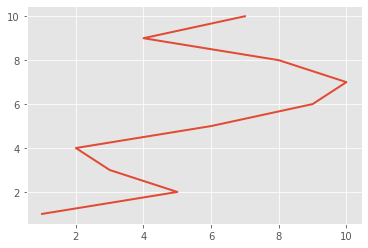

             Topic           Model ID_Query_Item ID_Rank_Item  Model_Score  \
0  Entity_Matching  Paper_Abstract            19           14     0.891288   
0  Entity_Matching  Paper_Abstract            19            9     0.849841   
0  Entity_Matching  Paper_Abstract            19            6     0.822315   
0  Entity_Matching  Paper_Abstract            19           12     0.818192   
0  Entity_Matching  Paper_Abstract            19           17     0.800308   
0  Entity_Matching  Paper_Abstract            19           18     0.792578   
0  Entity_Matching  Paper_Abstract            19           25     0.767277   
0  Entity_Matching  Paper_Abstract            19           33     0.736222   
0  Entity_Matching  Paper_Abstract            19           27     0.709200   
0  Entity_Matching  Paper_Abstract            19           15     0.543414   

  Rank  Model_Rank  
0    2           1  
0   10           2  
0    5           3  
0    3           4  
0    1           5  
0    4         

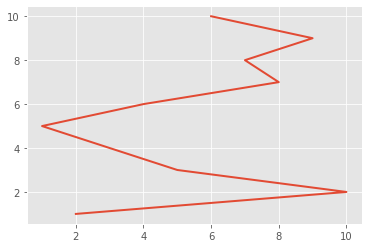

             Topic        Model ID_Query_Item ID_Rank_Item  Model_Score Rank  \
0  Entity_Matching  Paper_Title             1            7     0.882202    1   
0  Entity_Matching  Paper_Title             1            9     0.837135    9   
0  Entity_Matching  Paper_Title             1           10     0.832227    2   
0  Entity_Matching  Paper_Title             1           21     0.821277    6   
0  Entity_Matching  Paper_Title             1            5     0.817328    5   
0  Entity_Matching  Paper_Title             1            3     0.776361   10   
0  Entity_Matching  Paper_Title             1           31     0.733910    4   
0  Entity_Matching  Paper_Title             1            0     0.703520    7   
0  Entity_Matching  Paper_Title             1           11     0.686082    3   
0  Entity_Matching  Paper_Title             1           23     0.611354    8   

   Model_Rank  
0           1  
0           2  
0           3  
0           4  
0           5  
0           6  
0      

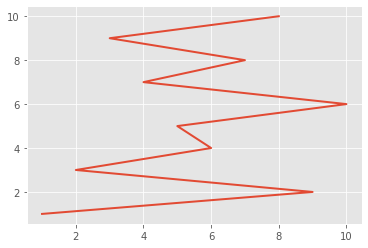

             Topic        Model ID_Query_Item ID_Rank_Item  Model_Score Rank  \
0  Entity_Matching  Paper_Title            19           14     0.946621    2   
0  Entity_Matching  Paper_Title            19           17     0.874793    1   
0  Entity_Matching  Paper_Title            19           12     0.872116    3   
0  Entity_Matching  Paper_Title            19            9     0.853166   10   
0  Entity_Matching  Paper_Title            19           25     0.827268    8   
0  Entity_Matching  Paper_Title            19            6     0.824295    5   
0  Entity_Matching  Paper_Title            19           18     0.818768    4   
0  Entity_Matching  Paper_Title            19           27     0.725641    9   
0  Entity_Matching  Paper_Title            19           33     0.650970    7   
0  Entity_Matching  Paper_Title            19           15     0.604874    6   

   Model_Rank  
0           1  
0           2  
0           3  
0           4  
0           5  
0           6  
0      

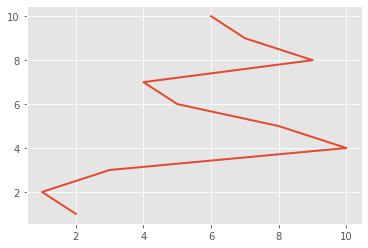

                  Topic                Model ID_Query_Item ID_Rank_Item  \
0  Image_Classification  Dataset_Description            42           53   
0  Image_Classification  Dataset_Description            42           54   
0  Image_Classification  Dataset_Description            42           56   
0  Image_Classification  Dataset_Description            42           60   
0  Image_Classification  Dataset_Description            42           50   
0  Image_Classification  Dataset_Description            42           51   
0  Image_Classification  Dataset_Description            42           66   
0  Image_Classification  Dataset_Description            42           45   
0  Image_Classification  Dataset_Description            42           57   
0  Image_Classification  Dataset_Description            42           55   

   Model_Score Rank  Model_Rank  
0     0.897355    9           1  
0     0.891281   10           2  
0     0.886775    1           3  
0     0.883237    8           4  
0   

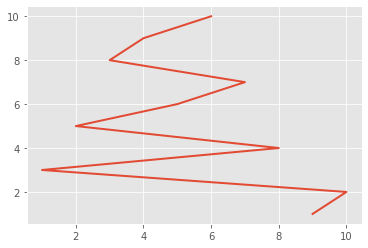

                  Topic                Model ID_Query_Item ID_Rank_Item  \
0  Image_Classification  Dataset_Description            49           50   
0  Image_Classification  Dataset_Description            49           62   
0  Image_Classification  Dataset_Description            49           54   
0  Image_Classification  Dataset_Description            49           56   
0  Image_Classification  Dataset_Description            49           66   
0  Image_Classification  Dataset_Description            49           42   
0  Image_Classification  Dataset_Description            49           60   
0  Image_Classification  Dataset_Description            49           60   
0  Image_Classification  Dataset_Description            49           55   
0  Image_Classification  Dataset_Description            49           51   

   Model_Score Rank  Model_Rank  
0     0.926702    1           1  
0     0.886435    5           2  
0     0.884748    7           3  
0     0.881941    2           4  
0   

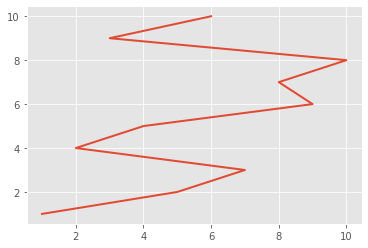

                  Topic         Model ID_Query_Item ID_Rank_Item  Model_Score  \
0  Image_Classification  Dataset_Name            42           60     0.902835   
0  Image_Classification  Dataset_Name            42           56     0.900767   
0  Image_Classification  Dataset_Name            42           55     0.872901   
0  Image_Classification  Dataset_Name            42           53     0.741661   
0  Image_Classification  Dataset_Name            42           51     0.717601   
0  Image_Classification  Dataset_Name            42           50     0.706695   
0  Image_Classification  Dataset_Name            42           66     0.686722   
0  Image_Classification  Dataset_Name            42           45     0.682009   
0  Image_Classification  Dataset_Name            42           54     0.654389   
0  Image_Classification  Dataset_Name            42           57     0.366327   

  Rank  Model_Rank  
0    8           1  
0    1           2  
0    6           3  
0    9           4  
0  

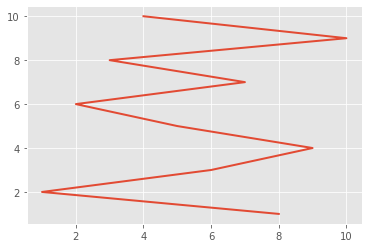

                  Topic         Model ID_Query_Item ID_Rank_Item  Model_Score  \
0  Image_Classification  Dataset_Name            49           50          NaN   
0  Image_Classification  Dataset_Name            49           56          NaN   
0  Image_Classification  Dataset_Name            49           55          NaN   
0  Image_Classification  Dataset_Name            49           66          NaN   
0  Image_Classification  Dataset_Name            49           62          NaN   
0  Image_Classification  Dataset_Name            49           51          NaN   
0  Image_Classification  Dataset_Name            49           54          NaN   
0  Image_Classification  Dataset_Name            49           60          NaN   
0  Image_Classification  Dataset_Name            49           42          NaN   
0  Image_Classification  Dataset_Name            49           60          NaN   

  Rank  Model_Rank  
0    1           1  
0    2           2  
0    3           3  
0    4           4  
0  

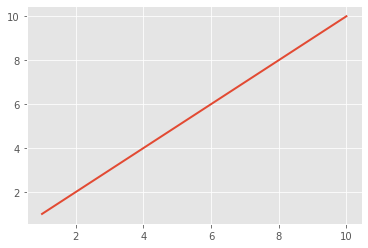

                  Topic           Model ID_Query_Item ID_Rank_Item  \
0  Image_Classification  Paper_Abstract            42           57   
0  Image_Classification  Paper_Abstract            42           60   
0  Image_Classification  Paper_Abstract            42           56   
0  Image_Classification  Paper_Abstract            42           45   
0  Image_Classification  Paper_Abstract            42           66   
0  Image_Classification  Paper_Abstract            42           50   
0  Image_Classification  Paper_Abstract            42           54   
0  Image_Classification  Paper_Abstract            42           55   
0  Image_Classification  Paper_Abstract            42           51   
0  Image_Classification  Paper_Abstract            42           53   

   Model_Score Rank  Model_Rank  
0     0.736715    4           1  
0     0.646672    8           2  
0     0.640025    1           3  
0     0.568175    3           4  
0     0.529718    7           5  
0     0.481971    2      

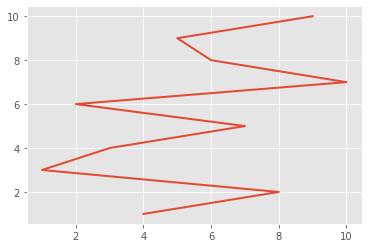

                  Topic           Model ID_Query_Item ID_Rank_Item  \
0  Image_Classification  Paper_Abstract            49           56   
0  Image_Classification  Paper_Abstract            49           42   
0  Image_Classification  Paper_Abstract            49           66   
0  Image_Classification  Paper_Abstract            49           62   
0  Image_Classification  Paper_Abstract            49           60   
0  Image_Classification  Paper_Abstract            49           60   
0  Image_Classification  Paper_Abstract            49           54   
0  Image_Classification  Paper_Abstract            49           50   
0  Image_Classification  Paper_Abstract            49           51   
0  Image_Classification  Paper_Abstract            49           55   

   Model_Score Rank  Model_Rank  
0     0.817922    2           1  
0     0.816680    9           2  
0     0.652717    4           3  
0     0.646643    5           4  
0     0.637410    8           5  
0     0.637410   10      

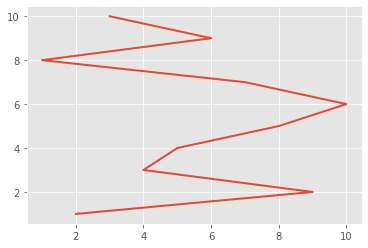

                  Topic        Model ID_Query_Item ID_Rank_Item  Model_Score  \
0  Image_Classification  Paper_Title            42           56     0.912638   
0  Image_Classification  Paper_Title            42           54     0.885271   
0  Image_Classification  Paper_Title            42           66     0.873762   
0  Image_Classification  Paper_Title            42           60     0.864838   
0  Image_Classification  Paper_Title            42           57     0.863567   
0  Image_Classification  Paper_Title            42           55     0.857074   
0  Image_Classification  Paper_Title            42           53     0.779372   
0  Image_Classification  Paper_Title            42           50     0.763869   
0  Image_Classification  Paper_Title            42           51     0.670265   
0  Image_Classification  Paper_Title            42           45     0.633940   

  Rank  Model_Rank  
0    1           1  
0   10           2  
0    7           3  
0    8           4  
0    4        

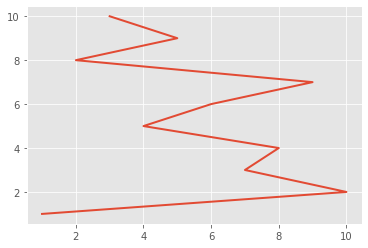

                  Topic        Model ID_Query_Item ID_Rank_Item  Model_Score  \
0  Image_Classification  Paper_Title            49           56     0.945170   
0  Image_Classification  Paper_Title            49           62     0.910315   
0  Image_Classification  Paper_Title            49           42     0.905528   
0  Image_Classification  Paper_Title            49           60     0.894691   
0  Image_Classification  Paper_Title            49           60     0.894691   
0  Image_Classification  Paper_Title            49           54     0.892237   
0  Image_Classification  Paper_Title            49           66     0.875725   
0  Image_Classification  Paper_Title            49           55     0.858499   
0  Image_Classification  Paper_Title            49           50     0.830100   
0  Image_Classification  Paper_Title            49           51     0.722869   

  Rank  Model_Rank  
0    2           1  
0    5           2  
0    9           3  
0    8           4  
0   10        

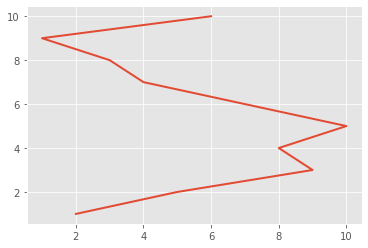

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
for key, grp in rankedlists:
  
  grp['Model_Rank']= range(1,len(grp)+1)
  print(grp)
  #corr_columns=pd.DataFrame()
  #corr_columns['Manual_Rank']=grp['Rank']
  #corr_columns['Model_Rank']=grp['Model_Rank']
  #corr_columns.index=range(len(corr_columns))
  #corr_columns.reset_index(drop=True, inplace=True)
 # print(corr_columns)
  #print(corr_columns.corr("kendall"),10)
  #print(str(key)+"\t"+str(stats.spearmanr(grp['Rank'].to_numpy(), grp['Model_Rank'].to_numpy())))
  fig, ax = plt.subplots()
  ax.plot(grp['Rank'].to_numpy().astype(int), grp['Model_Rank'].to_numpy().astype(int), linewidth=2.0)

  df = pd.DataFrame({'A': grp['Rank'].to_numpy().astype(int),
                   'B': grp['Model_Rank'].to_numpy().astype(int)})

  corr = df.corr(method = 'kendall')
  print(corr)
  #sns.heatmap(corr, annot = True)

  plt.show()


In [ ]:
res=pd.DataFrame(columns=['Model', 'Topic','ID_Query_Item', 'Value'])

#res=pd.DataFrame(columns=['Model', 'Topic''ID_Query_Item', 'Value'])


for key, grp in rankedlists:
   
  grp['Model_Rank']= range(1,len(grp)+1)
  print(grp)
  grp=grp.dropna()
  print(grp)
 
  df = pd.DataFrame({'A': grp['Rank'].to_numpy().astype(int),
                   'B': grp['Model_Rank'].to_numpy().astype(int)})

  corr = df.corr(method = 'kendall')

  correlation_value=corr.loc['A','B']

  #addframe=pd.DataFrame(columns=['Model', 'Topic''ID_Query_Item', 'Value'])
  if grp.empty or len(grp.index)<2:
    continue
  res=res.append(pd.DataFrame([[grp.iloc(0)[1]['Model'], grp.iloc(0)[1]['Topic'], grp.iloc(0)[1]['ID_Query_Item'], correlation_value]],columns=['Model', 'Topic','ID_Query_Item', 'Value']))
 
  #addframe.append(grp.iloc(0)[1]['Model'], grp.iloc(0)[1]['Topic'], grp.iloc(0)[1]['ID_Query_Item'], correlation_value)


  #print(grp.iloc(0)[1]['Topic'])
  #print(grp.iloc(0)[1]['Topic'])
  print(corr)
 
  print(correlation_value)
  
  
  #mod_df = res.append({'Model'.item(0),
   #                 'Topic'. item(0),
   #                 'ID_Query_Item'.item(0),
   #                'Value'.correlation_value})

  #print(mod_df)
res

             Topic                Model ID_Query_Item ID_Rank_Item  \
0  Entity_Matching  Dataset_Description             1            5   
0  Entity_Matching  Dataset_Description             1           11   
0  Entity_Matching  Dataset_Description             1           23   
0  Entity_Matching  Dataset_Description             1            3   
0  Entity_Matching  Dataset_Description             1           10   
0  Entity_Matching  Dataset_Description             1            7   
0  Entity_Matching  Dataset_Description             1           31   
0  Entity_Matching  Dataset_Description             1           21   
0  Entity_Matching  Dataset_Description             1            0   
0  Entity_Matching  Dataset_Description             1            9   

   Model_Score Rank  Model_Rank  
0     0.991379    5           1  
0     0.922630    3           2  
0     0.845011    8           3  
0     0.828758   10           4  
0     0.816916    2           5  
0     0.814715    1      

,Model,Topic,ID_Query_Item,Value
0,Dataset_Description,Entity_Matching,1,0.055556
0,Dataset_Description,Entity_Matching,19,0.222222
0,Dataset_Name,Entity_Matching,1,0.066667
0,Dataset_Name,Entity_Matching,19,-0.155556
0,Paper_Abstract,Entity_Matching,1,0.422222
0,Paper_Abstract,Entity_Matching,19,0.244444
0,Paper_Title,Entity_Matching,1,0.200000
0,Paper_Title,Entity_Matching,19,0.333333
0,Dataset_Description,Image_Classification,42,-0.200000
0,Dataset_Description,Image_Classification,49,0.333333


In [ ]:
res.groupby(['Model','Topic']).mean()

Value
Model               Topic                         
Dataset_Description Entity_Matching       0.138889
                    Image_Classification  0.066667
Dataset_Name        Entity_Matching      -0.044444
                    Image_Classification  0.022222
Paper_Abstract      Entity_Matching       0.333333
                    Image_Classification  0.088889
Paper_Title         Entity_Matching       0.266667
                    Image_Classification -0.200000



---

